Cookie cutter code using astropy; aim is to filter pixels within a certain distance (0.25 deg) 
from a ds9 region definition and remove from the image

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from regions.core import PixCoord
from regions.shapes.circle import CirclePixelRegion
from regions import read_ds9
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import astropy.units as u
from tqdm import tqdm

In [3]:
# ds9 region file with standard syntax
regions_ds9 = read_ds9("bestfit-optimize-7d5degFree.reg")
# image to be filtered.
image = fits.open("bestfit-optimize-7d5degFree-rmWeakSrc_pointsource_powerlaw_2.00_residmap.fits")
wcs = WCS(image[0].header)
dpix = np.abs(wcs.wcs.cdelt[0]) * u.deg 


In [4]:
# convert physical coordinates into pixels for specific fits file
regions_pixel = [ PixCoord.from_sky(SkyCoord(reg.center), wcs) for reg in regions_ds9]

In [5]:
# convert pixel coord into CirclePixelRegion
regions_circle = [ CirclePixelRegion(reg[0],.25*u.deg / dpix) for reg in regions_pixel]

In [6]:
# next, create a mask / this is quite inefficient
nx, ny = np.shape(image[0].data)
mask = np.ones((nx,ny))
for reg in tqdm(regions_circle):
    for i in range(nx):
        for j in range(ny): 
            if PixCoord(i,j) in reg: mask[i][j] = 0

100%|██████████| 68/68 [05:58<00:00,  5.06s/it]


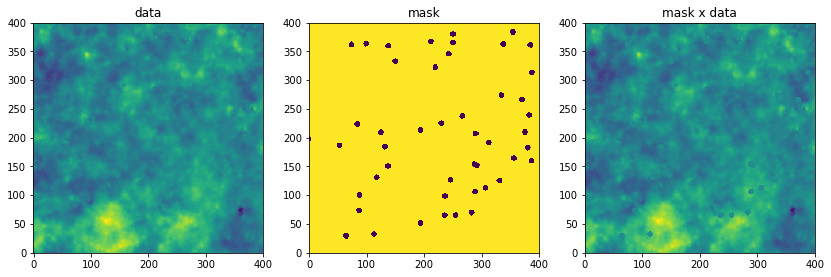

In [8]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(14,6))
data_sets = [image[0].data, mask, image[0].data * mask]
labels=['data','mask','mask x data']

for i, ax in enumerate(axes.flatten()):
    ax.set_title(labels[i])
    ax.imshow(data_sets[i], cmap=plt.cm.viridis, origin='lower')
